In [2]:
# Name: Ruidi Zhao
# Email: ruidizhao2022@u.northwestern.edu
# Time: 07/21/2021
# Data Source: Police Department Incident Reports: 2018 to Present, https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783

In [120]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

%matplotlib notebook

# Read Data 

In [121]:
# Read data
data = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv")
data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,...,-122.413487,POINT (-122.41348740024354 37.77999173926721),21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,...,-122.427819,POINT (-122.42781910073226 37.77578657487239),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,...,-122.422830,POINT (-122.42283006837721 37.72394419349765),90.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,...,-122.403636,POINT (-122.40363551943442 37.7751608100771),32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,...,-122.413623,POINT (-122.4136227157606 37.80275505740129),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481988 entries, 0 to 481987
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     481988 non-null  object 
 1   Incident Date                                         481988 non-null  object 
 2   Incident Time                                         481988 non-null  object 
 3   Incident Year                                         481988 non-null  int64  
 4   Incident Day of Week                                  481988 non-null  object 
 5   Report Datetime                                       481988 non-null  object 
 6   Row ID                                                481988 non-null  int64  
 7   Incident ID                                           481988 non-null  int64  
 8   Incident Number                             

In [123]:
data.describe()

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
count,481988.000000,4.819880e+05,4.819880e+05,4.819880e+05,3.764330e+05,481988.000000,4.574320e+05,457432.000000,457432.000000,457432.000000,447556.000000,5137.0,62002.0,61693.0,103122.000000,0.0,457348.000000,456825.000000
mean,2019.194119,8.366119e+10,8.366116e+05,1.934723e+08,1.944192e+08,25045.973105,2.532243e+07,5.967156,37.769227,-122.423966,52.885954,1.0,1.0,1.0,2.352311,NaN,6.662959,4.914751
std,1.027332,1.243610e+10,1.243610e+05,1.103151e+07,2.014577e+07,25816.809596,3.099176e+06,2.810835,0.024313,0.026278,32.636858,0.0,0.0,0.0,1.381157,NaN,3.338961,2.739083
min,2018.000000,6.186871e+10,6.186870e+05,0.000000e+00,1.000000e+00,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295,1.000000,1.0,1.0,1.0,1.000000,NaN,1.000000,1.000000
25%,2018.000000,7.290163e+10,7.290158e+05,1.860127e+08,1.829921e+08,6244.000000,2.396700e+07,3.000000,37.755390,-122.434558,22.000000,1.0,1.0,1.0,1.000000,NaN,3.000000,3.000000
50%,2019.000000,8.367322e+10,8.367315e+05,1.907519e+08,1.924023e+08,7043.000000,2.492300e+07,6.000000,37.775695,-122.417806,49.000000,1.0,1.0,1.0,3.000000,NaN,7.000000,5.000000
75%,2020.000000,9.441793e+10,9.441792e+05,2.005018e+08,2.021135e+08,60180.000000,2.643900e+07,8.000000,37.785893,-122.407337,86.000000,1.0,1.0,1.0,3.000000,NaN,10.000000,7.000000
max,2021.000000,1.052060e+11,1.052060e+06,9.814243e+08,1.000000e+09,75030.000000,5.412200e+07,11.000000,37.829991,-122.363743,117.000000,1.0,1.0,1.0,5.000000,NaN,11.000000,10.000000


In [124]:
# Missing Values
data.isnull().sum()

Incident Datetime                                            0
Incident Date                                                0
Incident Time                                                0
Incident Year                                                0
Incident Day of Week                                         0
Report Datetime                                              0
Row ID                                                       0
Incident ID                                                  0
Incident Number                                              0
CAD Number                                              105555
Report Type Code                                             0
Report Type Description                                      0
Filed Online                                            385523
Incident Code                                                0
Incident Category                                          406
Incident Subcategory                                   

In [125]:
# Missing Values by percentage
data.isnull().sum()/data.shape[0] * 100

Incident Datetime                                         0.000000
Incident Date                                             0.000000
Incident Time                                             0.000000
Incident Year                                             0.000000
Incident Day of Week                                      0.000000
Report Datetime                                           0.000000
Row ID                                                    0.000000
Incident ID                                               0.000000
Incident Number                                           0.000000
CAD Number                                               21.899923
Report Type Code                                          0.000000
Report Type Description                                   0.000000
Filed Online                                             79.986016
Incident Code                                             0.000000
Incident Category                                         0.08

## Exploratory Data Analysis

I am interested in the solved rate of incidents by year. That is, what percentage of reported incident has been finally solved? If there is an increasing or decreasing trend of the solved rate, what is the reason behind it? 

In [126]:
# Create a column indicates whether the incident has been solved or not
data['Solved'] = (data['Resolution'] != 'Open or Active') * 1
Solved_d = data.groupby(['Incident ID'])['Solved'].sum()
Solved_d = Solved_d.to_dict()
data['Solved'] = data['Incident ID'].map(Solved_d)
data['Solved'] = data['Solved'] >= 1
data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,Solved
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,...,POINT (-122.41348740024354 37.77999173926721),21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0,False
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,...,POINT (-122.42781910073226 37.77578657487239),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0,False
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,...,POINT (-122.42283006837721 37.72394419349765),90.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,False
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,...,POINT (-122.40363551943442 37.7751608100771),32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0,True
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,...,POINT (-122.4136227157606 37.80275505740129),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,True


<IPython.core.display.Javascript object>


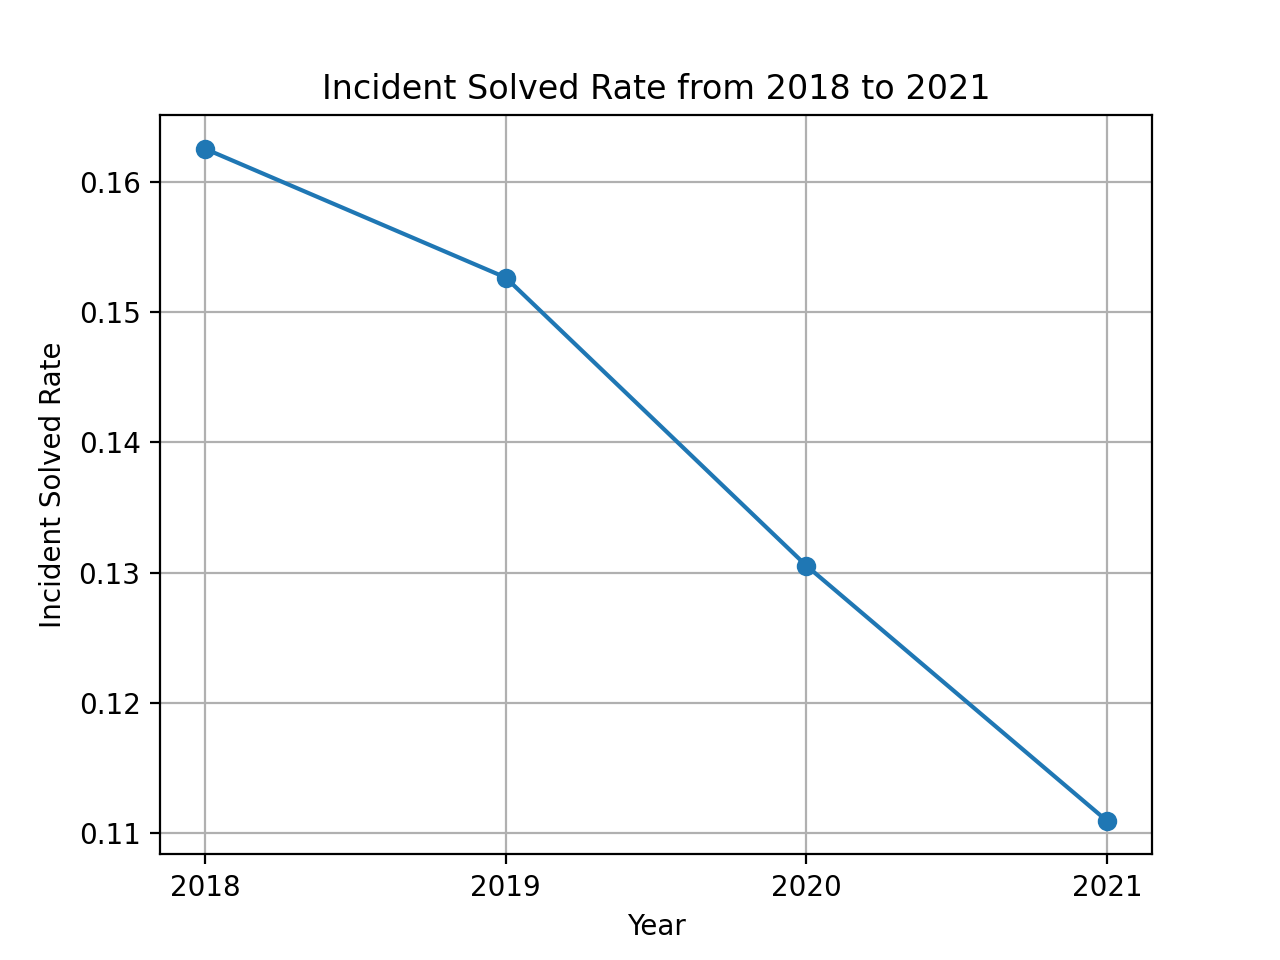

In [127]:
# Check the mean solved rate for different years and plot 
resolved_rate_by_year = pd.DataFrame((data.groupby(['Incident ID'])['Solved', 'Incident Year'].mean()).groupby(['Incident Year'])['Solved'].mean()).reset_index()
fig, ax = plt.subplots()
ax.plot(resolved_rate_by_year['Incident Year'].apply(lambda x: str(x)), resolved_rate_by_year['Solved'], marker='o')
ax.set(xlabel='Year', ylabel='Incident Solved Rate', title='Incident Solved Rate from 2018 to 2021')
ax.grid()

Indeed, there is a decreasing rate of the solved rate. I would like to investigate the reason behind such decrease. 

### What is the reason that the solved rate is keep decreasing from 2018 to 2021

### Guess 1: Number of incident

In [128]:
incident_num_by_year = data.groupby(['Incident Year'])['Incident ID'].nunique()
incident_num_by_year = pd.DataFrame(incident_num_by_year).reset_index()
incident_num_by_year.columns = ['Year', 'Count']
incident_num_by_year

,Year,Count
0,2018,126308
1,2019,122783
2,2020,97323
3,2021,53803


<IPython.core.display.Javascript object>


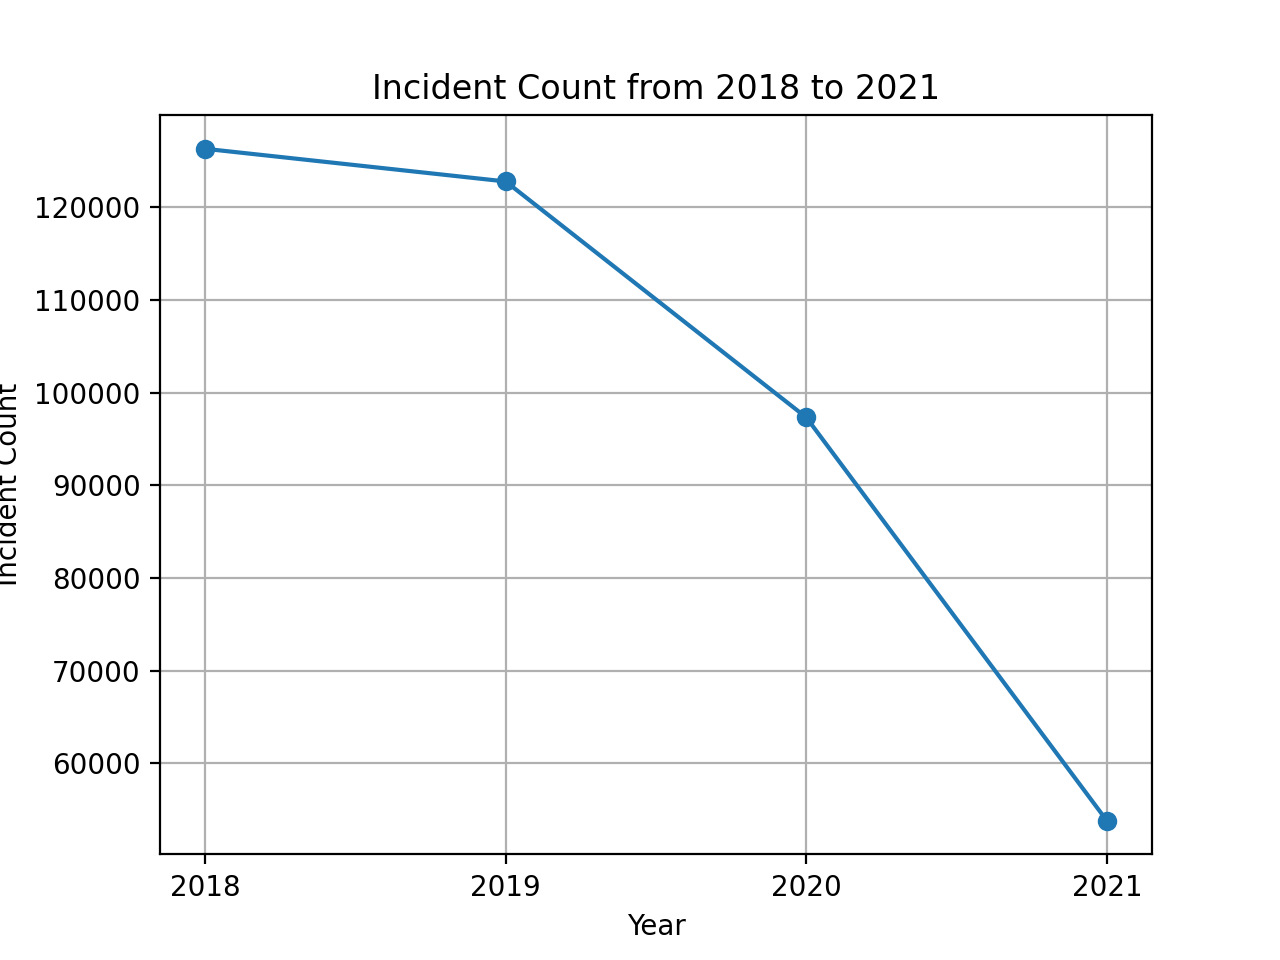

In [129]:
fig, ax = plt.subplots()
ax.plot(incident_num_by_year['Year'].apply(lambda x: str(x)), incident_num_by_year['Count'], marker='o')
ax.set(xlabel='Year', ylabel='Incident Count', title='Incident Count from 2018 to 2021')
ax.grid()

### Guess 2: Incident Time (Day/Night)

Based on the sunrise/sunset graph of San Francisco, 7 am - 7 pm is usually considered day and 7 pm - 7 am is usually considered night. <br>
https://sunrise-sunset.org/us/san-francisco-ca

In [133]:
data['Incident Day/Night'] = (data['Incident Time'] >= "07:00") & (data['Incident Time'] < "19:00")
data['Incident Day/Night'].replace({True:'Day', False:"Night"}, inplace=True)
data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,Solved,Incident Day/Night
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,...,21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0,False,Night
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,...,22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0,False,Day
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,...,90.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,False,Day
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,...,32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0,True,Day
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,...,106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,True,Night


In [232]:
def count_by_year_plot(col, title):
    """
    Return a graph that plot the count of incidents by interested feature and year
    
    Parameters:
    col: feature interested in
    title: title of the plot
    """
    # Create table 
    temp = pd.DataFrame(data.groupby([col, 'Incident Year'])['Incident ID'].nunique()).reset_index()
    temp.columns = [col, 'Incident Year', 'Count']
    
    # Plot
    g = alt.Chart(temp).mark_bar().encode(
    x='Incident Year:N',
    y='Count:Q',
    color='Incident Year:N',
    column=alt.Column(col)
).properties(title=title)
    return g

In [233]:
def rate_by_year_plot(col, title):
    """
    Return a graph that plot the solved rate of incidents by interested feature and year
    
    Parameters:
    col: feature interested in
    title: title of the plot
    """
    # Creat table 
    temp = pd.DataFrame(data.groupby(['Incident ID'])['Solved', 'Incident Year'].mean())
    temp.reset_index(inplace=True)
    d = data[['Incident ID', col]].sort_values('Incident ID').set_index('Incident ID').to_dict()
    temp[col] = temp['Incident ID'].map(d[col])
    temp = temp.groupby([col, 'Incident Year'])['Solved'].mean().reset_index()
    temp.columns = [col, 'Incident Year', 'Solved Rate']
   
    # Plot
    g = alt.Chart(temp).mark_bar().encode(
    x='Incident Year:N',
    y='Solved Rate:Q',
    color='Incident Year:N',
    column=alt.Column(col+":N", header=alt.Header(labelAngle=8))
).properties(title=title)
    
    return g

In [234]:
count_by_year_plot('Incident Day/Night', 'Incident Count by Day/Night and Year')

alt.Chart(...)

In [148]:
rate_by_year_plot('Incident Day/Night', 'Incident Solved Rate by Day/Night and Year')

alt.Chart(...)

### Guess 3: Incident Categories

In [11]:
data['Incident Category'].nunique()

49

In [149]:
count_by_year_plot('Incident Category', 'Incident Count by Category and Year')

alt.Chart(...)

In [150]:
rate_by_year_plot('Incident Category', 'Incident Solved Rate by Category and Year')

alt.Chart(...)

### Guess 4: Incident Day of the Week

In [153]:
data['Incident Day of Week'].value_counts()

Friday       73535
Wednesday    71108
Monday       68964
Saturday     68435
Thursday     68278
Tuesday      67966
Sunday       63702
Name: Incident Day of Week, dtype: int64

In [157]:
count_by_year_plot('Incident Day of Week', 'Incident Count by Category and Year')

alt.Chart(...)

In [168]:
rate_by_year_plot('Incident Day of Week', 'Incident Solved rate by Category and Year')

alt.Chart(...)

### Guess 5: Police District

In [187]:
data['Police District'].value_counts()

Central       71731
Northern      65588
Mission       62049
Southern      57937
Tenderloin    45731
Bayview       42197
Ingleside     36626
Taraval       33280
Richmond      30103
Park          23219
Out of SF     13527
Name: Police District, dtype: int64

In [188]:
count_by_year_plot('Police District', 'Incident Count by Police District and Year')

alt.Chart(...)

In [189]:
rate_by_year_plot('Police District', 'Incident Solved rate by Police District and Year')

alt.Chart(...)

## Analysis of the statistical significance

$H_{0}$: The solved rates from 2018 to 2021 are the same. <br>
$H_{1}$: At least one rate is different from the other. 

Hypothesis Testing Method: ANOVA <br>
Assumption: 
  - Normality: The data is large enough so based on Central Limit Theorem, the solved rate approximate a normal distribution
  - HomoscedasticL Assume that the variances of different year are the same. 
   - Independence: Assume that the data is indepedent across and within the different years

In [195]:
k = 4
n = data.shape[0]


In [216]:
# Calculate SSTR
overall_mean = data['Solved'].mean()
n_2018 = data[data['Incident Year'] == 2018].shape[0]
mean_2018 = data[data['Incident Year'] == 2018]['Solved'].mean()
n_2019 = data[data['Incident Year'] == 2019].shape[0]
mean_2019 = data[data['Incident Year'] == 2019]['Solved'].mean()
n_2020 = data[data['Incident Year'] == 2020].shape[0]
mean_2020 = data[data['Incident Year'] == 2020]['Solved'].mean()
n_2021 = data[data['Incident Year'] == 2021].shape[0]
mean_2021 = data[data['Incident Year'] == 2021].shape[0]


SSTR = n_2018 * ((mean_2018 - overall_mean) ** 2) + n_2019 * ((mean_2019 - overall_mean) ** 2) + \
                n_2020 * ((mean_2020 - overall_mean) ** 2) + n_2021 * ((mean_2021 - overall_mean) ** 2)
SSTR

265721901149874.0

In [218]:
# Calculate SSE
data_2018 = data[data['Incident Year'] == 2018]['Solved']
data_2019 = data[data['Incident Year'] == 2019]['Solved']
data_2020 = data[data['Incident Year'] == 2020]['Solved']
data_2021 = data[data['Incident Year'] == 2021]['Solved']

SSE = 0

for i in data_2018:
    SSE += (i - mean_2018) ** 2
for i in data_2019:
    SSE += (i - mean_2019) ** 2
for i in data_2020:
    SSE += (i - mean_2020) ** 2
for i in data_2021:
    SSE += (i - mean_2021) ** 2

In [219]:
SSE

265722242575931.75

In [220]:
MSTR = SSTR/(k-1)
MSE = SSE/(n-k)

In [235]:
F = MSTR/MSE

In [224]:
import scipy.stats

In [226]:
crit = scipy.stats.f.ppf(q=1-0.05, dfn=k-1, dfd=n-k)
F > crit

True

In [236]:
F

160661.12689985926

In [237]:
crit

2.604927716639695